In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import mixture

In [3]:
schiller_df = pd.read_csv("./clean_data/clean_schiller.csv")

In [4]:
schiller_df.head(4)

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
0,0.317899,0.008975,0.142670,0.264625,0.051382,0.022907,0.0,0.000291,0.016850,0.003351,...,178.019319,0.327891,0.486702,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.551028,0.007583,0.096114,0.241423,0.056713,0.012370,0.0,0.132463,0.039886,0.003695,...,86.659527,0.570223,0.532907,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.570135,0.008553,0.212171,0.262682,0.052377,0.015785,0.0,0.021698,0.010502,0.002046,...,101.940392,0.517132,0.554941,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.456403,0.006923,0.118763,0.372608,0.047079,0.010110,0.0,0.009945,0.029686,0.005111,...,75.267157,0.311316,0.596119,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [5]:
schiller_df = pd.get_dummies(schiller_df)

In [7]:
schiller_df.head(4)

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
0,0.317899,0.008975,0.142670,0.264625,0.051382,0.022907,0.0,0.000291,0.016850,0.003351,...,178.019319,0.327891,0.486702,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.551028,0.007583,0.096114,0.241423,0.056713,0.012370,0.0,0.132463,0.039886,0.003695,...,86.659527,0.570223,0.532907,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.570135,0.008553,0.212171,0.262682,0.052377,0.015785,0.0,0.021698,0.010502,0.002046,...,101.940392,0.517132,0.554941,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.456403,0.006923,0.118763,0.372608,0.047079,0.010110,0.0,0.009945,0.029686,0.005111,...,75.267157,0.311316,0.596119,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [8]:
X = schiller_df = schiller_df.drop(columns=['experts::0','experts::1','experts::2','experts::3','experts::4','experts::5','consensus'], axis=1)


In [9]:
print(type(X))
X = X.as_matrix()

<class 'pandas.core.frame.DataFrame'>


c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [10]:
print(type(X))

<class 'numpy.ndarray'>


In [11]:
print(X)

[[3.17898880e-01 8.97479486e-03 1.42670409e-01 ... 1.78019319e+02
  3.27891146e-01 4.86701989e-01]
 [5.51027825e-01 7.58330884e-03 9.61141108e-02 ... 8.66595274e+01
  5.70222911e-01 5.32907255e-01]
 [5.70135339e-01 8.55320846e-03 2.12170806e-01 ... 1.01940392e+02
  5.17131999e-01 5.54940856e-01]
 ...
 [6.96616000e-01 6.69278757e-03 1.69086662e-01 ... 1.96767870e+02
  4.53208712e-01 5.90185377e-01]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.56792378e+02
  1.00000000e+00 4.02562574e-01]
 [1.00000000e+00 7.51687210e-03 0.00000000e+00 ... 3.56792378e+02
  2.20803705e-01 4.02562574e-01]]


In [12]:
X.shape

(92, 62)

In [13]:
print(X[1,:])

[5.51027825e-01 7.58330884e-03 9.61141108e-02 2.41422829e-01
 5.67128843e-02 1.23700196e-02 0.00000000e+00 1.32462550e-01
 3.98864935e-02 3.69451536e-03 0.00000000e+00 0.00000000e+00
 9.06137361e-02 2.39120053e-02 6.70483893e-02 4.69690424e+01
 2.53816771e+01 2.15873653e+01 7.23507195e+01 3.52467071e+01
 1.82114881e+01 1.70352190e+01 5.34581952e+01 5.89016810e+01
 3.27910100e+01 2.61106710e+01 9.16926909e+01 7.54616722e+01
 5.70598954e+01 1.84017769e+01 1.32521568e+02 5.77004433e+01
 4.59060896e+01 1.17943536e+01 1.03606533e+02 8.41873316e+01
 5.71112690e+01 2.70760626e+01 1.41298601e+02 4.32595486e+00
 2.35168860e+00 1.01327983e+02 4.17303244e+01 6.29302150e+01
 3.23031868e+01 4.14813443e+00 2.45192129e+00 9.11974064e+01
 3.80628513e+01 8.88217605e+01 5.73562687e+01 8.97662269e-01
 6.13847595e-01 8.23647111e-01 6.69009600e-01 6.40770366e-01
 8.59945861e-01 9.70143504e-01 5.67985893e-01 8.66595274e+01
 5.70222911e-01 5.32907255e-01]


In [14]:
print(X[:4,:])

[[3.17898880e-01 8.97479486e-03 1.42670409e-01 2.64625303e-01
  5.13821820e-02 2.29074560e-02 0.00000000e+00 2.91482951e-04
  1.68503053e-02 3.35119428e-03 0.00000000e+00 0.00000000e+00
  2.04350736e-01 5.64110257e-02 3.00466441e-01 7.25608948e+01
  1.99901104e+01 5.25707844e+01 9.25510052e+01 5.62723745e+01
  1.70645228e+01 3.92078518e+01 7.33368973e+01 8.46141345e+01
  2.78843255e+01 5.67298090e+01 1.12498460e+02 1.01685679e+02
  5.51033101e+01 4.65823685e+01 1.56788989e+02 8.08991355e+01
  5.06068727e+01 3.02922628e+01 1.31506008e+02 1.13311732e+02
  6.10889887e+01 5.22227429e+01 1.74400720e+02 4.15591798e+00
  2.69132000e+00 8.72976161e+01 2.73639278e+01 8.72614730e+01
  2.68954963e+01 4.11281345e+00 2.54292366e+00 8.12722711e+01
  3.21189044e+01 1.18526992e+02 6.10296582e+01 9.42148217e-01
  3.37419181e-01 8.32179961e-01 3.82007372e-01 6.11868969e-01
  5.19553852e-01 9.64936548e-01 3.29450553e-01 1.78019319e+02
  3.27891146e-01 4.86701989e-01]
 [5.51027825e-01 7.58330884e-03 9.611

In [15]:
print(X[0:2,0:2])

[[0.31789888 0.00897479]
 [0.55102782 0.00758331]]


In [16]:
print(X[0:2,:])

[[3.17898880e-01 8.97479486e-03 1.42670409e-01 2.64625303e-01
  5.13821820e-02 2.29074560e-02 0.00000000e+00 2.91482951e-04
  1.68503053e-02 3.35119428e-03 0.00000000e+00 0.00000000e+00
  2.04350736e-01 5.64110257e-02 3.00466441e-01 7.25608948e+01
  1.99901104e+01 5.25707844e+01 9.25510052e+01 5.62723745e+01
  1.70645228e+01 3.92078518e+01 7.33368973e+01 8.46141345e+01
  2.78843255e+01 5.67298090e+01 1.12498460e+02 1.01685679e+02
  5.51033101e+01 4.65823685e+01 1.56788989e+02 8.08991355e+01
  5.06068727e+01 3.02922628e+01 1.31506008e+02 1.13311732e+02
  6.10889887e+01 5.22227429e+01 1.74400720e+02 4.15591798e+00
  2.69132000e+00 8.72976161e+01 2.73639278e+01 8.72614730e+01
  2.68954963e+01 4.11281345e+00 2.54292366e+00 8.12722711e+01
  3.21189044e+01 1.18526992e+02 6.10296582e+01 9.42148217e-01
  3.37419181e-01 8.32179961e-01 3.82007372e-01 6.11868969e-01
  5.19553852e-01 9.64936548e-01 3.29450553e-01 1.78019319e+02
  3.27891146e-01 4.86701989e-01]
 [5.51027825e-01 7.58330884e-03 9.611

In [17]:
from sklearn.cluster import KMeans

In [18]:
cluster_range = range( 1, 20 )
cluster_errors = []

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [19]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

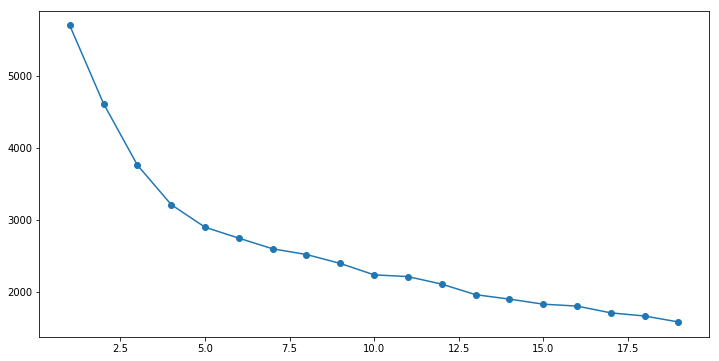

In [20]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [21]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(X)

In [22]:
kmeans.labels_

array([5, 5, 5, 5, 5, 4, 2, 4, 5, 5, 5, 7, 1, 7, 7, 0, 8, 8, 5, 5, 6, 1,
       3, 4, 2, 8, 6, 0, 6, 2, 5, 6, 0, 5, 4, 4, 2, 7, 3, 6, 6, 3, 4, 5,
       0, 4, 7, 7, 0, 4, 5, 7, 7, 4, 0, 7, 4, 0, 4, 0, 7, 4, 0, 3, 0, 4,
       7, 7, 7, 1, 0, 7, 0, 4, 2, 6, 1, 5, 1, 1, 5, 5, 5, 5, 5, 5, 2, 5,
       2, 5, 3, 3])

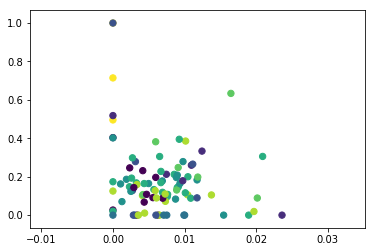

In [23]:
plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, s=40, cmap='viridis');

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)

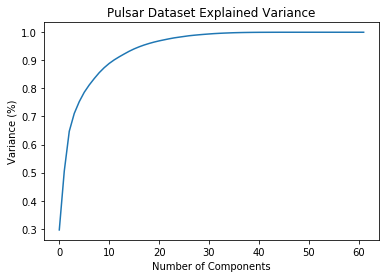

In [26]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [27]:
pca = PCA(n_components=25)
dataset = pca.fit_transform(data_rescaled)

In [28]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( dataset )
  cluster_errors.append( clusters.inertia_ )

In [29]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [30]:
clusters_df_pca = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

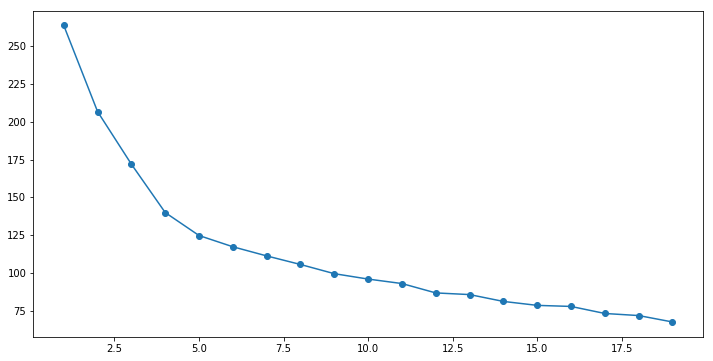

In [31]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df_pca.num_clusters, clusters_df_pca.cluster_errors, marker = "o" )

In [32]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dataset)

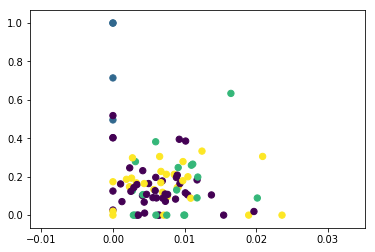

In [33]:
plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, s=40, cmap='viridis');

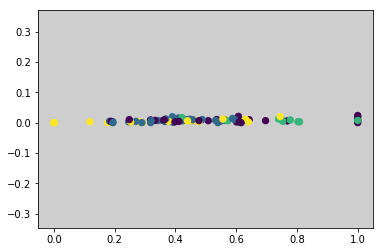

In [34]:
plot_kmeans(kmeans, X)

In [35]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(62,2))

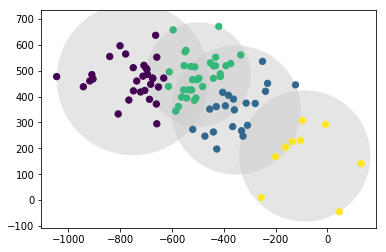

In [36]:
plot_kmeans(kmeans, X_stretched)

In [37]:
gmm =  mixture.GaussianMixture(n_components=3).fit(X)

In [38]:
labels = gmm.predict(X)

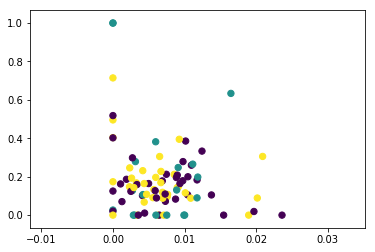

In [39]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [40]:
probs = gmm.predict_proba(X)

In [41]:
print(probs[:5].round(3))

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [42]:
print(probs[5:10].round(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [43]:
print(probs[150:155].round(3))

[]


In [44]:
print(probs[75:80].round(3))

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [45]:
size = 50 * probs.max(1)

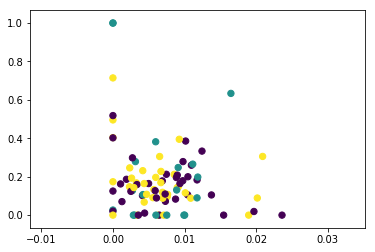

In [46]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [47]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full', random_state=42)

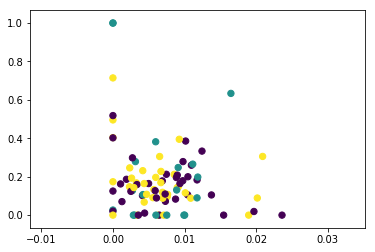

In [48]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [49]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

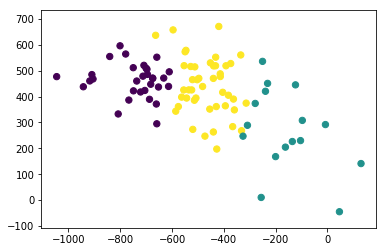

In [50]:
plot_gmm(gmm, X_stretched)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

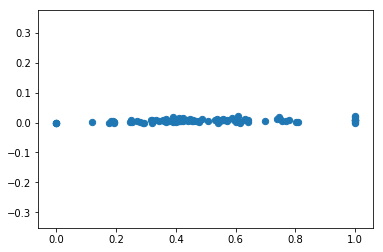

In [51]:
plot_gmm(gmm, X, label=False)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

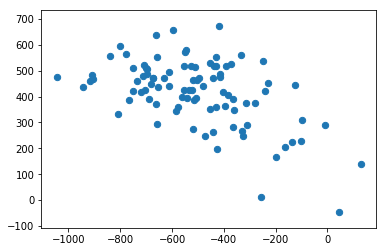

In [52]:
plot_gmm(gmm, X_stretched, label=False)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

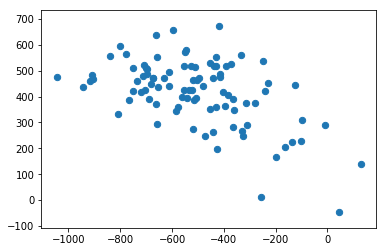

In [53]:
gmm16 = mixture.GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, X_stretched, label=False)

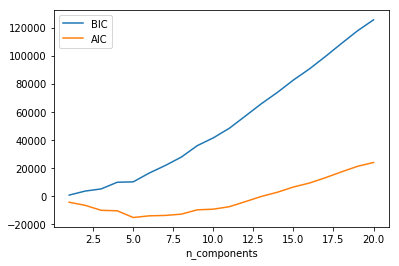

In [54]:
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

### Modelos de mistura para as ALP